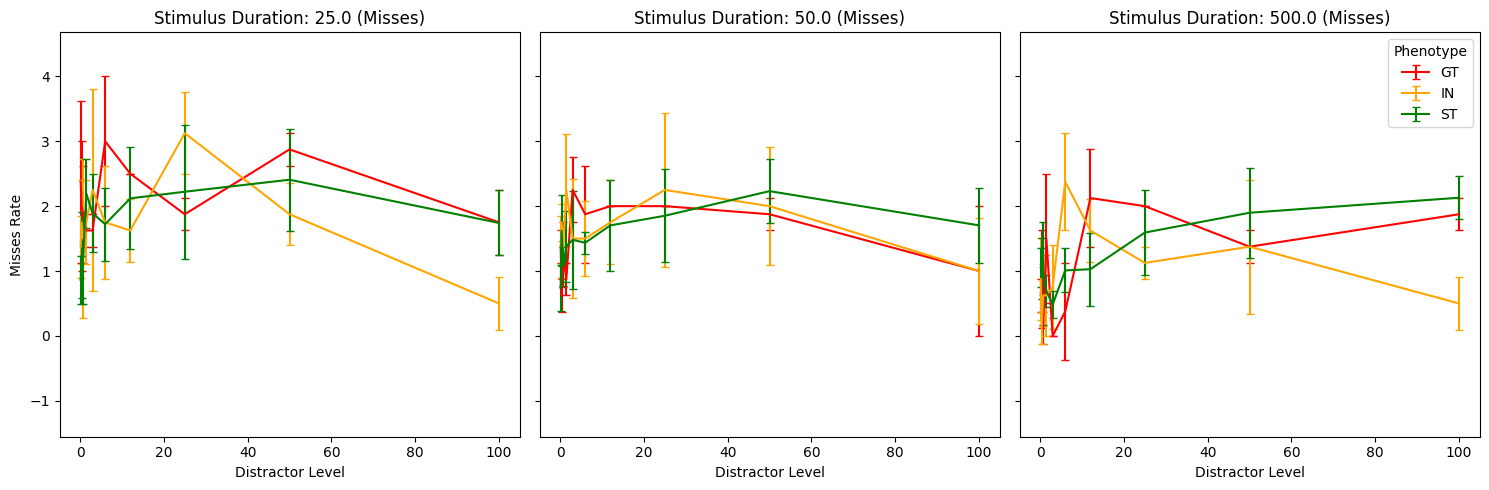

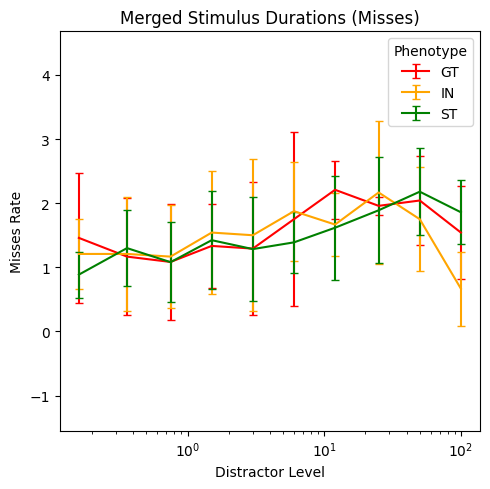

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file and the 'Tidy_Hitmiss' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_hitmiss_df = pd.read_excel(xls, sheet_name='Tidy_Hitmiss')

# Filter out necessary data
stimulus_durations = tidy_hitmiss_df['stimulus_duration'].unique()
phenotypes = tidy_hitmiss_df['phenotype'].unique()

# Prepare a dictionary to map phenotypes to colors
colors = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Prepare to calculate the mean and standard deviation for each combination (using Misses)
grouped_misses_data = tidy_hitmiss_df.groupby(['stimulus_duration', 'Distractor_level', 'phenotype']).agg({
    'Misses': ['mean', 'std']
}).reset_index()

# Prepare for plotting Misses
fig, axs = plt.subplots(1, len(stimulus_durations), figsize=(15, 5), sharey=True)

# Set common Y limit for all graphs for Misses
y_min_misses = grouped_misses_data['Misses']['mean'].min() - grouped_misses_data['Misses']['std'].max()
y_max_misses = grouped_misses_data['Misses']['mean'].max() + grouped_misses_data['Misses']['std'].max()

# Plot each stimulus duration for Misses in separate subplots
for i, duration in enumerate(stimulus_durations):
    ax = axs[i]
    
    # Filter the data for the current stimulus duration
    duration_data = grouped_misses_data[grouped_misses_data['stimulus_duration'] == duration]
    
    # Plot each phenotype line for Misses
    for phenotype in phenotypes:
        phenotype_data = duration_data[duration_data['phenotype'] == phenotype]
        ax.errorbar(phenotype_data['Distractor_level'], 
                    phenotype_data['Misses']['mean'], 
                    yerr=phenotype_data['Misses']['std'], 
                    label=phenotype, 
                    color=colors[phenotype], 
                    capsize=3)
    
    # Set axis labels and title
    ax.set_xlabel('Distractor Level')
    ax.set_title(f'Stimulus Duration: {duration} (Misses)')
    ax.set_ylim([y_min_misses, y_max_misses])

# Set common Y label
axs[0].set_ylabel('Misses Rate')

# Add legend and adjust layout
axs[-1].legend(title='Phenotype')
plt.tight_layout()
plt.show()

# Now for the merged data for Misses (ignoring stimulus duration distinction)
merged_misses_data = tidy_hitmiss_df.groupby(['Distractor_level', 'phenotype']).agg({
    'Misses': ['mean', 'std']
}).reset_index()

# Plot the merged data for Misses
plt.figure(figsize=(5, 5))

for phenotype in phenotypes:
    phenotype_data = merged_misses_data[merged_misses_data['phenotype'] == phenotype]
    plt.errorbar(phenotype_data['Distractor_level'], 
                 phenotype_data['Misses']['mean'], 
                 yerr=phenotype_data['Misses']['std'], 
                 label=phenotype, 
                 color=colors[phenotype], 
                 capsize=3)

plt.xlabel('Distractor Level')
plt.ylabel('Misses Rate')
plt.ylim([y_min_misses, y_max_misses])
plt.xscale('log')
plt.title('Merged Stimulus Durations (Misses)')
plt.legend(title='Phenotype')
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import pingouin as pg

# Load the Excel file and the 'Tidy_Hitmiss' sheet
file_path = 'Sat9surrond.xlsx'
xls = pd.ExcelFile(file_path)
tidy_hitmiss_df = pd.read_excel(xls, sheet_name='Tidy_Hitmiss')


# Clean the data and only keep relevant columns (phenotype, Animal_ID, Distractor_level, Misses)
tidy_hitmiss_df_clean = tidy_hitmiss_df[['phenotype', 'Animal_ID', 'Distractor_level', 'Misses']].dropna()

# Perform a mixed-design ANOVA for Misses with Distractor Level as the within-subject factor
aov_misses = pg.mixed_anova(dv='Misses', 
                            within='Distractor_level', 
                            between='phenotype', 
                            subject='Animal_ID', 
                            data=tidy_hitmiss_df_clean, 
                            effsize='n2')  # Generalized eta-squared effect size

# Run pairwise post-hoc comparisons with Bonferroni correction for Distractor Level
posthoc_misses = pg.pairwise_tests(dv='Misses', 
                                   within='Distractor_level', 
                                   between='phenotype', 
                                   subject='Animal_ID', 
                                   data=tidy_hitmiss_df_clean, 
                                   padjust='bonf')  # Bonferroni correction for post-hoc

# Round the results for better readability
aov_misses_rounded = aov_misses.round(4)
posthoc_misses_rounded = posthoc_misses.round(4)

# Print the ANOVA results for Misses
print("ANOVA Results for Misses (Distractor Level Only):")
print(aov_misses_rounded)

# Print the Post-hoc results for Misses
print("\nPost-hoc Results for Misses (Distractor Level Only):")
print(posthoc_misses_rounded)

# Optionally, you can export the results to CSV files for better viewing:
aov_misses_rounded.to_csv("anova_misses_results.csv", index=False)
posthoc_misses_rounded.to_csv("posthoc_misses_results.csv", index=False)

ANOVA Results for Misses (Distractor Level Only):
             Source       SS  DF1  DF2      MS        F   p-unc  p-GG-corr  \
0         phenotype   0.2983    2   14  0.1491   0.6883  0.5187        NaN   
1  Distractor_level  17.2683    9  126  1.9187  16.3137  0.0000        0.0   
2       Interaction   7.4561   18  126  0.4142   3.5220  0.0000        NaN   

       n2     eps sphericity  W-spher  p-spher  
0  0.0070     NaN        NaN      NaN      NaN  
1  0.4028  0.4893      False   0.0027   0.0036  
2  0.1739     NaN        NaN      NaN      NaN  

Post-hoc Results for Misses (Distractor Level Only):
                        Contrast Distractor_level     A     B Paired  \
0               Distractor_level                -  0.16  0.36   True   
1               Distractor_level                -  0.16  0.75   True   
2               Distractor_level                -  0.16   1.5   True   
3               Distractor_level                -  0.16   3.0   True   
4               Distractor_

C:\Users\pfh3221\AppData\Roaming\Python\Python38\site-packages\pingouin\parametric.py:266: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tval, pval = ttest_ind(x, y, equal_var=True, alternative=alternative)
C:\Users\pfh3221\AppData\Roaming\Python\Python38\site-packages\pingouin\parametric.py:261: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  tval, pval = ttest_ind(x, y, equal_var=False, alternative=alternative)
